In [7]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../"))

# our library
from src.mcmc_sat import mcmc, sat

In [9]:
def gen_conf_matrix(y: np.ndarray):
    """
    Simple function to generate the configuration matrix for variable number of roads
    """
    num_vers = y.size+1
    num_pathways = num_vers-1

    pathways = []
    for i in range(1,num_vers+1):
        for j in range(1,num_vers+1):
            if i < j:
                pathways += [(i,j)]

    print(pathways)

    return np.array([[ 1 if (p1<=i and i<p2) else 0 for (p1,p2) in pathways] for i in range(1, num_pathways+1)])    

In [ ]:
A = np.array([[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0],
[0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0],
[0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1]])

y=np.array([1087, 1008, 1068, 1204, 1158, 1151, 1143])

In [16]:
np.array([int(i/10) for i in y])

array([108, 100, 106, 120, 115, 115, 114])

In [24]:
num_con = 4
yprime  = np.array([int(i/10) for i in y[:num_con]]) #y[:num_con]
Aprime  = gen_conf_matrix(yprime)

print(Aprime)
print(yprime)

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
[[1 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 0 1 1 1 1 0]
 [0 0 0 1 0 0 1 0 1 1]]
[108 100 106 120]


In [ ]:
# Maja's model

# Assumption, all bit-vectors are of the same size
num_bits = 11
num_vars = 6 # (age, gender)
var_list = [BitVec(f'x{i}',num_bits) for i in range(num_vars)]
x = var_list
g = Goal()
sat.add_bool_vars_to_goal(g, var_list)
# sat.addition_does_not_overflow([x[0], x[1], x[2], x[3], x[4]])
# sat.addition_does_not_overflow([x[5], x[5], x[7], x[8], x[8]])
for i in range(num_vars):
    g.add(ULE(0,x[i]))
g.add(x[0] + x[1] + x[2] == yprime[0]) 
g.add(x[1] + x[2] + x[3] + x[4] == yprime[1]) 
g.add(x[2] + x[4] + x[5]  == yprime[2]) 

trace = mcmc.sample_mh_trace_from_z3_model(backend='spur',
                                           z3_problem=g,
                                           num_vars= num_vars,
                                           num_bits= num_bits,
                                           num_samples=10000,
                                           num_chains=4)

In [25]:
# it produced only 400 samples...
trace = mcmc.sample_mh_trace_from_conf_matrix_sat(A=Aprime,y=yprime,num_bits=7,
                                                  num_samples=1000)

[x72 = True,
 x04 = False,
 x03 = False,
 x61 = False,
 x51 = True,
 x15 = True,
 x91 = False,
 x83 = False,
 x45 = True,
 x22 = True,
 x43 = False,
 x52 = True,
 x66 = False,
 x32 = False,
 x81 = False,
 x44 = False,
 x21 = True,
 x82 = False,
 x92 = False,
 x54 = True,
 x42 = False,
 x64 = False,
 x70 = True,
 x36 = True,
 x90 = False,
 x60 = False,
 x75 = False,
 x80 = False,
 x93 = False,
 x74 = True,
 x95 = False,
 x71 = False,
 x85 = False,
 x40 = False,
 x84 = False,
 x76 = False,
 x94 = False,
 x63 = False,
 x53 = True,
 x16 = True,
 x73 = False,
 x62 = False,
 x41 = False,
 x65 = True,
 x96 = False,
 x35 = False,
 x46 = False,
 x50 = False,
 x24 = True,
 x31 = False,
 x86 = False,
 x14 = False,
 x33 = True,
 x55 = False,
 x56 = False,
 x26 = False,
 x10 = True,
 x23 = True,
 x13 = True,
 x11 = True,
 x06 = True,
 x12 = True,
 x02 = True,
 x01 = True,
 x05 = True,
 x25 = True,
 x20 = True,
 x30 = False,
 x34 = True,
 x00 = False,
 x6 = 32,
 x7 = 21,
 x8 = 0,
 x9 = 0,
 x4 = 32,


Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	430/430/0
independent support size:  	0
clauses (all/long/binary/unit): 1678/1388/278/12
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	339 MB

STAGE #1: Build the initial partial assignments



time elapsed: 60.6688s


ZH - Rehash the table.
ts 2097152 2097151
ZH - Number of collisions.
coll 86453


ZH - Rehash the table.
ts 2097152 2097151
ZH - Number of collisions.
coll 28103



time elapsed: 121.669s


ZH - Rehash the table.
ts 2097152 2097151
ZH - Number of collisions.
coll 19997



time elapsed: 182.669s


ZH - Rehash the table.
ts 2097152 2097151
ZH - Number of collisions.
coll 19782



time elapsed: 243.669s



time elapsed: 304.669s


ZH - Rehash the table.
ts 2097152 2097151
ZH - Number of collisions.
coll 20199


KeyboardInterrupt: 

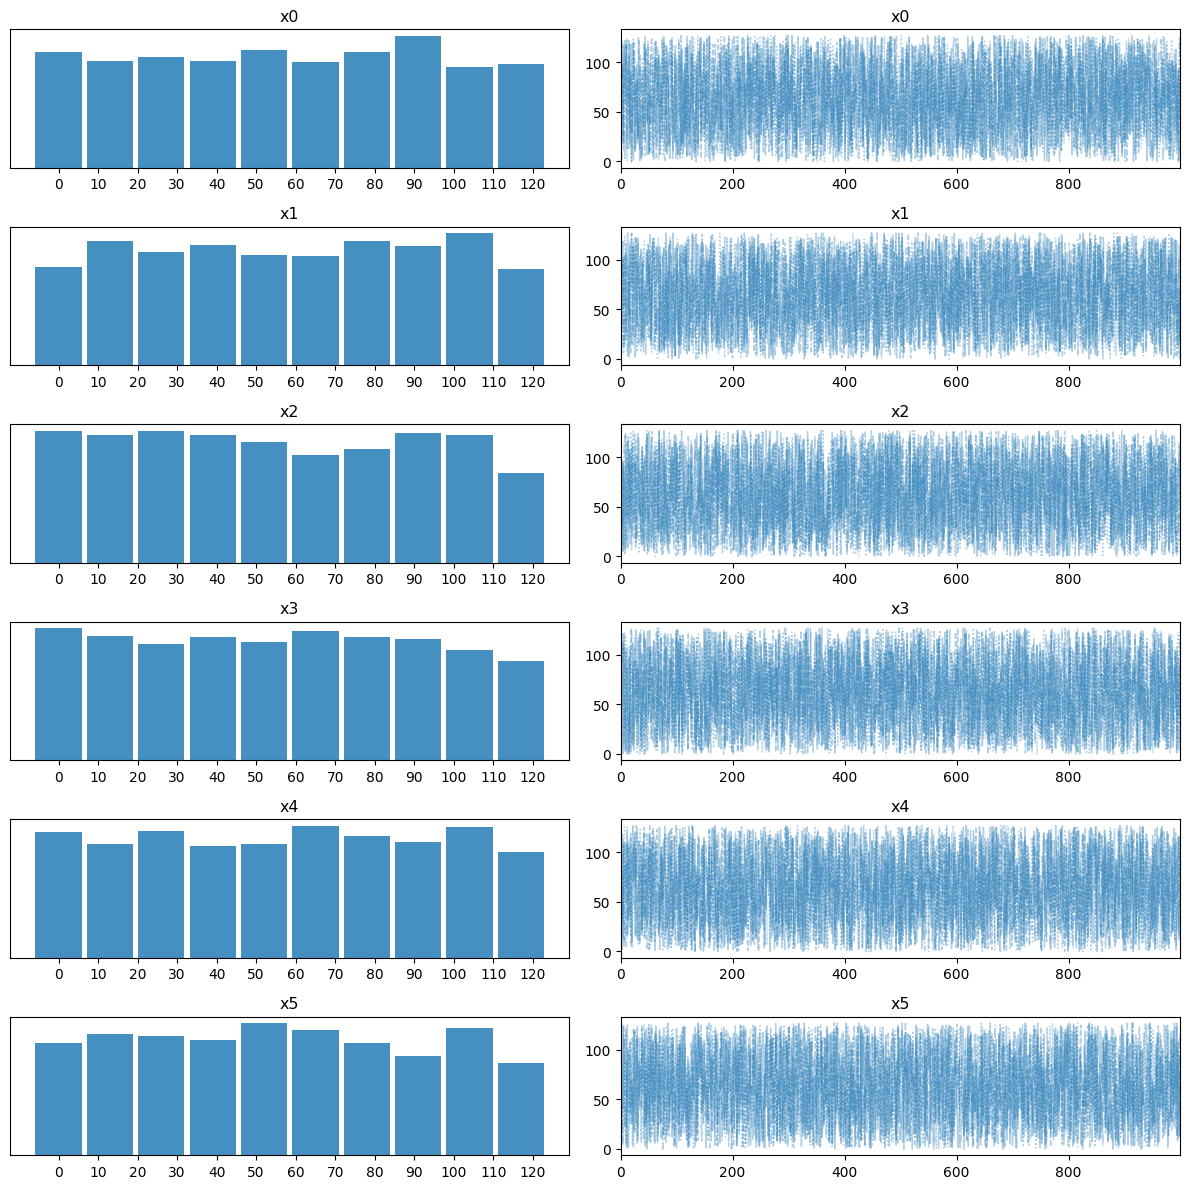

In [23]:
# Plot the posterior
import matplotlib.pyplot as plt
az.plot_trace(trace);
plt.savefig('spur_trace_plot.png', dpi=150);

In [55]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,-0.785,74.463,-126.0,114.0,0.382,0.270,38548.0,39520.0,1.0
x1,-1.776,74.036,-128.0,112.0,0.370,0.267,39813.0,37496.0,1.0
x2,0.650,73.816,-128.0,112.0,0.372,0.265,39333.0,38577.0,1.0
